# 词内嵌

使用 google news 作为示例。

In [4]:
%matplotlib inline

import os
from keras.utils import get_file
import gensim
import subprocess
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
figsize(10, 10)

from sklearn.manifold import TSNE
import json
from collections import Counter
from itertools import chain

In [5]:
MODEL = 'GoogleNews-vectors-negative300.bin'
path = get_file(MODEL + '.gz', 'https://s3.amazonaws.com/dl4j-distribution/%s.gz' % MODEL)
if not os.path.isdir('generated'):
    os.mkdir('generated')

unzipped = os.path.join('generated', MODEL)
if not os.path.isfile(unzipped):
    with open(unzipped, 'wb') as fout:
        zcat = subprocess.Popen(['zcat'],
                          stdin=open(path),
                          stdout=fout
                         )
        zcat.wait()

1647050752/1647046227 [==============================] - 814s 0us/step


In [8]:
# 加载模型
model = gensim.models.KeyedVectors.load_word2vec_format('./generated/' + MODEL, binary=True)

# 寻找相似词
model.most_similar(positive=['china'])

[('dinnerware', 0.6587947607040405),
 ('crockery', 0.6426128149032593),
 ('porcelain', 0.6392655372619629),
 ('crystal_stemware', 0.6264337301254272),
 ('chinaware', 0.6146420240402222),
 ('china_plates', 0.6145730018615723),
 ('silver_flatware', 0.6102818250656128),
 ('flatware', 0.6089655160903931),
 ('bone_china', 0.6068581938743591),
 ('tableware', 0.5923404693603516)]

In [9]:
# 寻找相似性
def A_is_to_B_as_C_is_to(a, b, c, topn=1):
    a, b, c = map(lambda x:x if type(x) == list else [x], (a, b, c))
    res = model.most_similar(positive=b + c, negative=a, topn=topn)
    if len(res):
        if topn == 1:
            return res[0][0]
        return [x[0] for x in res]
    return None
A_is_to_B_as_C_is_to('man', 'woman', 'king')

'queen'

其示意图如下：
![image](https://ws3.sinaimg.cn/large/69d4185bly1fyixsqfi2ej20bz096gmb.jpg)

In [10]:
for country in 'Italy', 'France', 'India', 'China':
    print('%s is the capital of %s' % 
          (A_is_to_B_as_C_is_to('Germany', 'Berlin', country), country))

Rome is the capital of Italy
Paris is the capital of France
Delhi is the capital of India
Beijing is the capital of China


In [12]:
for company in 'Google', 'IBM', 'Boeing', 'Microsoft', 'Samsung':
    products = A_is_to_B_as_C_is_to(
        ['Starbucks', 'Apple'], 
        ['Starbucks_coffee', 'iPhone'], 
        company, topn=3)
    print('%s -> %s' % 
          (company, ', '.join(products)))

Google -> personalized_homepage, app, Gmail
IBM -> DB2, WebSphere_Portal, Tamino_XML_Server
Boeing -> Dreamliner, airframe, aircraft
Microsoft -> Windows_Mobile, SyncMate, Windows
Samsung -> MM_A###, handset, Samsung_SCH_B###


# 可视化

In [20]:
beverages = ['espresso', 'beer', 'vodka', 'wine', 'cola', 'tea']
countries = ['Italy', 'Germany', 'Russia', 'France', 'USA', 'India']
sports = ['soccer', 'handball', 'hockey', 'cycling', 'basketball', 'cricket']

items = beverages + countries + sports

item_vectors = [(item, model[item]) 
                    for item in items
                    if item in model]

vectors = np.asarray([x[1] for x in item_vectors])
lengths = np.linalg.norm(vectors, axis=1)
norm_vectors = (vectors.T / lengths).T

tsne = TSNE(n_components=2, perplexity=10).fit_transform(norm_vectors)

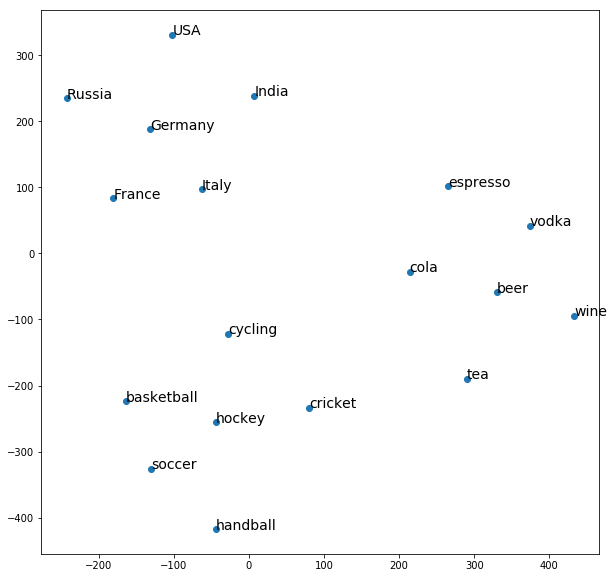

In [21]:
x=tsne[:,0]
y=tsne[:,1]

fig, ax = plt.subplots()
ax.scatter(x, y)

for item, x1, y1 in zip(item_vectors, x, y):
    ax.annotate(item[0], (x1, y1), size=14)

plt.show()

In [36]:
from sklearn import svm
import csv
import random
import geopandas as gpd

In [22]:
model = gensim.models.KeyedVectors.load_word2vec_format(unzipped, binary=True)
model.most_similar(positive=['Germany'])

[('Austria', 0.7461062073707581),
 ('German', 0.7178748846054077),
 ('Germans', 0.6628648042678833),
 ('Switzerland', 0.6506868600845337),
 ('Hungary', 0.6504982709884644),
 ('Germnay', 0.649348258972168),
 ('Netherlands', 0.6437496542930603),
 ('Cologne', 0.6430779695510864),
 ('symbol_RSTI', 0.6389946937561035),
 ('Annita_Kirsten', 0.6342948079109192)]

In [24]:
model.most_similar(positive=['Annita_Kirsten'])

[('Braustolz_GmbH', 0.7545095682144165),
 ('DIARY_Economic_Indicators', 0.7334568500518799),
 ('##-##_#####_Burscheid', 0.7307888269424438),
 ('WKN_A#N#Y#_Symbol', 0.7260339260101318),
 ('Hoevelaken', 0.7067489624023438),
 ('BMW_###si_1min_##.###secs', 0.7050351500511169),
 ('Primera_EUROPE', 0.699741005897522),
 ('symbol_RSTI', 0.6925466656684875),
 ('Severin_Freund', 0.6898956894874573),
 ('However_Joern_Lauterjung', 0.688573956489563)]

In [27]:
countries = list(csv.DictReader(open('data/countries.csv')))
countries[:10]

[OrderedDict([('name', 'Canada'), ('cc', 'ca'), ('cc3', 'can')]),
 OrderedDict([('name', 'Turkmenistan'), ('cc', 'tm'), ('cc3', 'tkm')]),
 OrderedDict([('name', 'Ethiopia'), ('cc', 'et'), ('cc3', 'eth')]),
 OrderedDict([('name', 'Swaziland'), ('cc', 'sz'), ('cc3', 'swz')]),
 OrderedDict([('name', 'Czech_Republic'), ('cc', 'cz'), ('cc3', 'cze')]),
 OrderedDict([('name', 'Cameroon'), ('cc', 'cm'), ('cc3', 'cmr')]),
 OrderedDict([('name', 'UAE'), ('cc', 'ae'), ('cc3', 'are')]),
 OrderedDict([('name', 'Liberia'), ('cc', 'lr'), ('cc3', 'lbr')]),
 OrderedDict([('name', 'Netherlands'), ('cc', 'nl'), ('cc3', 'nld')]),
 OrderedDict([('name', 'East_Timor'), ('cc', 'tl'), ('cc3', 'tls')])]

In [30]:
positive = [x['name'] for x in random.sample(countries, 40)]
negative = random.sample(model.vocab.keys(), 5000)
negative[:4]

['FMP', 'ALEX_MCLEISH', 'NCMGY_Short_Term_PowerRatings', 'NanoSpreader']

In [31]:
labelled = [(p, 1) for p in positive] + [(n, 0) for n in negative]
random.shuffle(labelled)
X = np.asarray([model[w] for w, l in labelled])
y = np.asarray([l for w, l in labelled])
X.shape, y.shape

((5040, 300), (5040,))

In [32]:
TRAINING_FRACTION = 0.3
cut_off = int(TRAINING_FRACTION * len(labelled))
clf = svm.SVC(kernel='linear')
clf.fit(X[:cut_off], y[:cut_off]) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
res = clf.predict(X[cut_off:])
missed = [country for (pred, truth, country) in 
 zip(res, y[cut_off:], labelled[cut_off:]) if pred != truth]

100 - 100 * float(len(missed)) / len(res), missed

(99.85827664399093,
 [('Afghanistan', 1),
  ('Turkmenistan', 1),
  ('Gaza_Strip', 1),
  ('North_Korea', 1),
  ('Swaziland', 0)])

In [35]:
all_predictions = clf.predict(model.syn0)
res = []
for word, pred in zip(model.index2word, all_predictions):
    if pred:
        res.append(word)
        if len(res) == 150:
            break
random.sample(res, 10)

['Algeria',
 'Argentina',
 'Cuba',
 'Angola',
 'Finland',
 'Armenia',
 'Czech_Republic',
 'Taiwan',
 'Romania',
 'Chile']

In [37]:
country_to_idx = {country['name']: idx for idx, country in enumerate(countries)}
country_vecs = np.asarray([model[c['name']] for c in countries])
country_vecs.shape

(184, 300)

In [38]:
dists = np.dot(country_vecs, country_vecs[country_to_idx['Canada']])
for idx in reversed(np.argsort(dists)[-10:]):
    print(countries[idx]['name'], dists[idx])

Canada 7.544024
New_Zealand 3.9619699
Finland 3.9392405
Puerto_Rico 3.838145
Jamaica 3.8102937
Sweden 3.8042789
Slovakia 3.7038739
Australia 3.671101
Bahamas 3.6240416
United_States 3.537434


In [39]:
def rank_countries(term, topn=10, field='name'):
    if not term in model:
        return []
    vec = model[term]
    dists = np.dot(country_vecs, vec)
    return [(countries[idx][field], float(dists[idx])) 
            for idx in reversed(np.argsort(dists)[-topn:])]
rank_countries('cricket')

[('Sri_Lanka', 5.92276668548584),
 ('Zimbabwe', 5.336524963378906),
 ('Bangladesh', 5.192488670349121),
 ('Pakistan', 4.948408126831055),
 ('Guyana', 3.9162840843200684),
 ('Barbados', 3.757995128631592),
 ('India', 3.7504398822784424),
 ('South_Africa', 3.6561501026153564),
 ('New_Zealand', 3.64202880859375),
 ('Fiji', 3.608567714691162)]

In [40]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


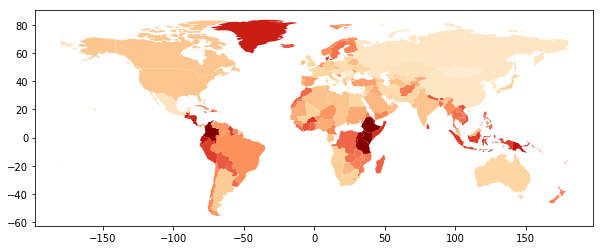

In [41]:
def map_term(term):
    d = {k.upper(): v for k, v in rank_countries(term, topn=0, field='cc3')}
    world[term] = world['iso_a3'].map(d)
    world[term] /= world[term].max()
    world.dropna().plot(term, cmap='OrRd')

map_term('coffee')

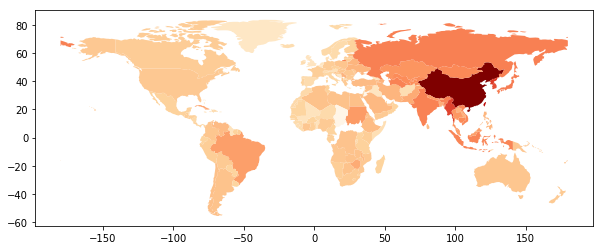

In [42]:
map_term('China')

# 推荐系统

In [43]:
import requests
from bs4 import BeautifulSoup
import os
import time
from keras.utils import get_file
try:
    from urllib.request import urlretrieve
except ImportError:
    from urllib import urlretrieve
import xml.sax

import subprocess
import mwparserfromhell
import json

In [44]:
index = requests.get('https://dumps.wikimedia.org/enwiki/').text
soup_index = BeautifulSoup(index, 'html.parser')
dumps = [a['href'] for a in soup_index.find_all('a') 
             if a.has_attr('href') and a.text[:-1].isdigit()]
dumps

['20180920/',
 '20181001/',
 '20181020/',
 '20181101/',
 '20181120/',
 '20181201/',
 '20181220/']

In [45]:
for dump_url in sorted(dumps, reverse=True):
    print(dump_url)
    dump_html = index = requests.get('https://dumps.wikimedia.org/enwiki/' + dump_url).text
    soup_dump = BeautifulSoup(dump_html, 'html.parser')
    pages_xml = [a['href'] for a in soup_dump.find_all('a') 
                 if a.has_attr('href') and a['href'].endswith('-pages-articles.xml.bz2')]
    if pages_xml:
        break
    time.sleep(0.8)

20181220/


In [ ]:
wikipedia_dump = pages_xml[0].rsplit('/')[-1]
url = url = 'https://dumps.wikimedia.org/' + pages_xml[0] 
path = get_file(wikipedia_dump, url)
path

In [47]:
def process_article(title, text):
    rotten = [(re.findall('\d\d?\d?%', p), re.findall('\d\.\d\/\d+|$', p), 
               p.lower().find('rotten tomatoes')) for p in text.split('\n\n')]
    rating = next(((perc[0], rating[0]) for perc, rating, idx in rotten 
                   if len(perc) == 1 and idx > -1), (None, None))
    wikicode = mwparserfromhell.parse(text)
    film = next((template for template in wikicode.filter_templates() 
                 if template.name.strip().lower() == 'infobox film'), None)
    if film:
        properties = {param.name.strip_code().strip(): param.value.strip_code().strip() 
                      for param in film.params
                      if param.value.strip_code().strip()
                     }
        links = [x.title.strip_code().strip() for x in wikicode.filter_wikilinks()]
        return (title, properties, links) + rating

In [48]:
class WikiXmlHandler(xml.sax.handler.ContentHandler):
    def __init__(self):
        xml.sax.handler.ContentHandler.__init__(self)
        self._buffer = None
        self._values = {}
        self._movies = []
        self._curent_tag = None

    def characters(self, content):
        if self._curent_tag:
            self._buffer.append(content)

    def startElement(self, name, attrs):
        if name in ('title', 'text'):
            self._curent_tag = name
            self._buffer = []

    def endElement(self, name):
        if name == self._curent_tag:
            self._values[name] = ' '.join(self._buffer)

        if name == 'page':
            movie = process_article(**self._values)
            if movie:
                self._movies.append(movie)

In [49]:
parser = xml.sax.make_parser()
handler = WikiXmlHandler()
parser.setContentHandler(handler)
for line in subprocess.Popen(['bzcat'], stdin=open(path), stdout=subprocess.PIPE).stdout:
    try:
        parser.feed(line)
    except StopIteration:
        break

In [51]:
with open('generated/wp_movies.ndjson', 'wt') as fout:
    for movie in handler._movies:
         fout.write(json.dumps(movie) + '\n')

## 训练

In [1]:
import json
from collections import Counter
from keras.models import Model
from keras.layers import Embedding, Input, Reshape
from keras.layers.merge import Dot
from sklearn.linear_model import LinearRegression
import numpy as np
import random
from sklearn import svm

Using TensorFlow backend.


In [2]:
with open('./data/wp_movies_10k.ndjson') as fin:
    movies = [json.loads(l) for l in fin]
link_counts = Counter()
for movie in movies:
    link_counts.update(movie[2])
link_counts.most_common(10)

[('Rotten Tomatoes', 9393),
 ('Category:English-language films', 5882),
 ('Category:American films', 5867),
 ('Variety (magazine)', 5450),
 ('Metacritic', 5112),
 ('Box Office Mojo', 4186),
 ('The New York Times', 3818),
 ('The Hollywood Reporter', 3553),
 ('Roger Ebert', 2707),
 ('Los Angeles Times', 2454)]

In [3]:
top_links = [link for link, c in link_counts.items() if c >= 3]
link_to_idx = {link: idx for idx, link in enumerate(top_links)}
movie_to_idx = {movie[0]: idx for idx, movie in enumerate(movies)}
pairs = []
for movie in movies:
    pairs.extend((link_to_idx[link], movie_to_idx[movie[0]]) 
                 for link in movie[2] if link in link_to_idx)
pairs_set = set(pairs)
len(pairs), len(top_links), len(movie_to_idx)

(949544, 66913, 10000)

In [4]:
def movie_embedding_model(embedding_size=50):
    link = Input(name='link', shape=(1,))
    movie = Input(name='movie', shape=(1,))
    link_embedding = Embedding(name='link_embedding', 
                               input_dim=len(top_links), 
                               output_dim=embedding_size)(link)
    movie_embedding = Embedding(name='movie_embedding', 
                                input_dim=len(movie_to_idx), 
                                output_dim=embedding_size)(movie)
    dot = Dot(name='dot_product', normalize=True, axes=2)([link_embedding, 
                                                           movie_embedding])
    merged = Reshape((1,))(dot)
    model = Model(inputs=[link, movie], outputs=[merged])
    model.compile(optimizer='nadam', loss='mse')
    return model

model = movie_embedding_model()
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
link (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
movie (InputLayer)              (None, 1)            0                                            
__________________________________________________________________________________________________
link_embedding (Embedding)      (None, 1, 50)        3345650     link[0][0]                       
__________________________________________________________________________________________________
movie_embedding (Embedding)     (None, 1, 50)        500000      movie[0][0]                      
__________________________________________________________________________________________________
dot_produc

In [5]:
random.seed(5)

def batchifier(pairs, positive_samples=50, negative_ratio=10):
    batch_size = positive_samples * (1 + negative_ratio)
    batch = np.zeros((batch_size, 3))
    while True:
        for idx, (link_id, movie_id) in enumerate(random.sample(pairs, positive_samples)):
            batch[idx, :] = (link_id, movie_id, 1)
        idx = positive_samples
        while idx < batch_size:
            movie_id = random.randrange(len(movie_to_idx))
            link_id = random.randrange(len(top_links))
            if not (link_id, movie_id) in pairs_set:
                batch[idx, :] = (link_id, movie_id, -1)
                idx += 1
        np.random.shuffle(batch)
        yield {'link': batch[:, 0], 'movie': batch[:, 1]}, batch[:, 2]

next(batchifier(pairs, positive_samples=3, negative_ratio=2))

({'link': array([ 20558.,   3801.,  31254.,  48731.,  13365.,   1313.,  32318.,
          22418.,  32643.]),
  'movie': array([  849.,  5874.,  5530.,  1854.,  6238.,  7236.,  7685.,  1529.,
          7628.])},
 array([-1., -1.,  1., -1., -1.,  1., -1.,  1., -1.]))

In [6]:
positive_samples_per_batch = 512

model.fit_generator(
    batchifier(pairs, positive_samples=positive_samples_per_batch, negative_ratio=10),
    epochs=15,
    steps_per_epoch=len(pairs) // positive_samples_per_batch,
    verbose=2
)

Epoch 1/15
 - 51s - loss: 0.3801
Epoch 2/15
 - 45s - loss: 0.2316
Epoch 3/15
 - 45s - loss: 0.2265
Epoch 4/15
 - 44s - loss: 0.2234
Epoch 5/15
 - 44s - loss: 0.2222
Epoch 6/15
 - 44s - loss: 0.2209
Epoch 7/15
 - 44s - loss: 0.2203
Epoch 8/15
 - 44s - loss: 0.2199
Epoch 9/15
 - 44s - loss: 0.2191
Epoch 10/15
 - 44s - loss: 0.2187
Epoch 11/15
 - 45s - loss: 0.2185
Epoch 12/15
 - 45s - loss: 0.2192
Epoch 13/15
 - 44s - loss: 0.2180
Epoch 14/15
 - 44s - loss: 0.2177
Epoch 15/15
 - 44s - loss: 0.2171


In [7]:
movie = model.get_layer('movie_embedding')
movie_weights = movie.get_weights()[0]
movie_lengths = np.linalg.norm(movie_weights, axis=1)
normalized_movies = (movie_weights.T / movie_lengths).T

def similar_movies(movie):
    dists = np.dot(normalized_movies, normalized_movies[movie_to_idx[movie]])
    closest = np.argsort(dists)[-10:]
    for c in reversed(closest):
        print(c, movies[c][0], dists[c])

similar_movies('Rogue One')

29 Rogue One 1.0
19 Interstellar (film) 0.977467
659 Rise of the Planet of the Apes 0.970486
25 Star Wars sequel trilogy 0.970399
245 Gravity (film) 0.964282
3349 Star Wars: The Force Awakens 0.961698
140 Star Trek Into Darkness 0.959964
37 Avatar (2009 film) 0.959537
181 Pacific Rim (film) 0.956615
86 Tomorrowland (film) 0.955779


In [8]:
link = model.get_layer('link_embedding')
link_weights = link.get_weights()[0]
link_lengths = np.linalg.norm(link_weights, axis=1)
normalized_links = (link_weights.T / link_lengths).T

def similar_links(link):
    dists = np.dot(normalized_links, normalized_links[link_to_idx[link]])
    closest = np.argsort(dists)[-10:]
    for c in reversed(closest):
        print(c, top_links[c], dists[c])

similar_links('George Lucas')

127 George Lucas 1.0
2707 Star Wars 0.941141
3176 Star Wars (film) 0.940928
976 Hugo Award for Best Dramatic Presentation 0.931068
4830 widescreen 0.911054
4051 novelization 0.901116
2931 LaserDisc 0.899423
2778 Lucasfilm 0.896705
2983 Hugo Award 0.892938
2984 Saturn Award for Best Science Fiction Film 0.889028


In [9]:
best = ['Star Wars: The Force Awakens', 'The Martian (film)', 'Tangerine (film)', 
        'Straight Outta Compton (film)',
        'Brooklyn (film)', 'Carol (film)', 'Spotlight (film)']
worst = ['American Ultra', 'The Cobbler (2014 film)', 'Entourage (film)', 'Fantastic Four (2015 film)',
         'Get Hard', 'Hot Pursuit (2015 film)', 'Mortdecai (film)', 'Serena (2014 film)', 
         'Vacation (2015 film)']
y = np.asarray([1 for _ in best] + [0 for _ in worst])
X = np.asarray([normalized_movies[movie_to_idx[movie]] for movie in best + worst])
X.shape

(16, 50)

In [10]:
clf = svm.SVC(kernel='linear')
clf.fit(X, y) 

estimated_movie_ratings = clf.decision_function(normalized_movies)
best = np.argsort(estimated_movie_ratings)
print('best:')
for c in reversed(best[-5:]):
    print(c, movies[c][0], estimated_movie_ratings[c])

print('worst:')
for c in best[:5]:
    print(c, movies[c][0], estimated_movie_ratings[c])


best:
481 The Devil Wears Prada (film) 1.36248850481
66 Skyfall 1.28788892823
307 Les Misérables (2012 film) 1.15079429435
458 Hugo (film) 1.1358537917
3 Spectre (2015 film) 1.07848602044
worst:
1782 Scooby-Doo! WrestleMania Mystery -1.65814160594
5097 Ready to Rumble -1.60859557439
8559 Air Buddies -1.59409348448
1878 The Little Rascals (film) -1.57383561559
6388 Bring It On Again -1.56594074119


## 烂番茄

In [11]:
rotten_y = np.asarray([float(movie[-2][:-1]) / 100 for movie in movies if movie[-2]])
rotten_X = np.asarray([normalized_movies[movie_to_idx[movie[0]]] for movie in movies if movie[-2]])

TRAINING_CUT_OFF = int(len(rotten_X) * 0.8)
regr = LinearRegression()
regr.fit(rotten_X[:TRAINING_CUT_OFF], rotten_y[:TRAINING_CUT_OFF])


error = (regr.predict(rotten_X[TRAINING_CUT_OFF:]) - rotten_y[TRAINING_CUT_OFF:])
'mean square error %2.2f' % np.mean(error ** 2)

'mean square error 0.06'

In [12]:
error = (np.mean(rotten_y[:TRAINING_CUT_OFF]) - rotten_y[TRAINING_CUT_OFF:])
'mean square error %2.2f' % np.mean(error ** 2)

'mean square error 0.09'

In [13]:
def gross(movie):
    v = movie[1].get('gross')
    if not v or not ' ' in v:
        return None
    v, unit = v.split(' ', 1)
    unit = unit.lower()
    if not unit in ('million', 'billion'):
        return None
    if not v.startswith('$'):
        return None
    try:
        v = float(v[1:])
    except ValueError:
        return None
    if unit == 'billion':
        v *= 1000
    return v

movie_gross = [gross(m) for m in movies]
movie_gross = np.asarray([gr for gr in movie_gross if gr is not None])
highest = np.argsort(movie_gross)[-10:]
for c in reversed(highest):
    print(c, movies[c][0], movie_gross[c])

6 The Martian (film) 10900.0
7 List of Marvel Cinematic Universe films 4300.0
49 Back to the Future 3900.0
71 The Conjuring 2932.0
162 Thor (film) 2464.0
36 Furious 7 2340.0
30 Finding Dory 2187.0
1906 Jane Eyre (2011 film) 2068.0
19 Interstellar (film) 1670.0
2251 An American Werewolf in London 1655.0


In [14]:
gross_y = np.asarray([gr for gr in movie_gross if gr])
gross_X = np.asarray([normalized_movies[movie_to_idx[movie[0]]] 
                      for movie, gr in zip(movies, movie_gross) if gr])
TRAINING_CUT_OFF = int(len(gross_X) * 0.8)
regr = LinearRegression()
regr.fit(gross_X[:TRAINING_CUT_OFF], gross_y[:TRAINING_CUT_OFF])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
error = (regr.predict(gross_X[TRAINING_CUT_OFF:]) - gross_y[TRAINING_CUT_OFF:])
'mean square error %2.2f' % np.mean(error ** 2)

'mean square error 8547.27'

In [16]:
error = (np.mean(gross_y[:TRAINING_CUT_OFF]) - gross_y[TRAINING_CUT_OFF:])
'mean square error %2.2f' % np.mean(error ** 2)

'mean square error 14115.59'

# 生成文本

In [4]:
try:
    GUTENBERG = True
    from gutenberg.acquire import load_etext
    from gutenberg.query import get_etexts, get_metadata
    from gutenberg.acquire import get_metadata_cache
    from gutenberg.acquire.text import UnknownDownloadUriException
    from gutenberg.cleanup import strip_headers
    from gutenberg._domain_model.exceptions import CacheAlreadyExistsException
except ImportError:
    GUTENBERG = False
    print('Gutenberg is not installed. See instructions at https://pypi.python.org/pypi/Gutenberg')
from keras.models import Input, Model
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.layers.wrappers import TimeDistributed
import keras.callbacks
import keras.backend as K
import scipy.misc
import json

import os, sys
import re
import PIL
from PIL import ImageDraw

from keras.optimizers import RMSprop
import random
import numpy as np
import tensorflow as tf
from keras.utils import get_file

from IPython.display import clear_output, Image, display, HTML
try:
    from io import BytesIO
except ImportError:
    from StringIO import StringIO as BytesIO

## 生成莎士比亚戏剧

In [5]:
if GUTENBERG:
    cache = get_metadata_cache()
    try:
        cache.populate()
    except CacheAlreadyExistsException:
        pass
if GUTENBERG:
    for text_id in get_etexts('author', 'Shakespeare, William'):
        print(text_id, list(get_metadata('title', text_id))[0])

1536 The Life of Timon of Athens
1537 Pericles, Prince of Tyre
1538 Cymbeline
39939 Kuningas Henrik Viides
1527 Twelfth Night; Or, What You Will
1539 The Winter's Tale
1540 The Tempest
1541 The Life of Henry the Eighth
1528 The History of Troilus and Cressida
1543 A Lover's Complaint
1544 The Passionate Pilgrim
1545 The Passionate Pilgrim
43532 Miten haluatte
1529 All's Well That Ends Well
1546 Sonnets on Sundry Notes of Music
17930 Le songe d'une nuit d'été
24036 Sonnet 130
1041 Shakespeare's Sonnets
7185 Othello
7186 Was ihr wollt
1530 Measure for Measure
1045 Venus and Adonis
16893 Macbeth
1531 Othello, the Moor of Venice
1124 The History of Troilus and Cressida
1532 The Tragedy of King Lear
32797 Οθέλλος
Σαικσπείρου Τραγωδίαι Μέρος Β'
22045 La festa dels reis
Lo que vulgueu
22556 Cymbeline
44580 Loppu hyvä, kaikki hyvä
1127 The Tragedy of Othello, Moor of Venice
10281 Antony's Address over the Body of Caesar
From Julius Caesar
12842 A Fairy Tale in Two Acts Taken from Shakespeare (

In [6]:
if GUTENBERG:
    shakespeare = strip_headers(load_etext(100))
else:
    path = get_file('shakespeare', 'https://storage.googleapis.com/deep-learning-cookbook/100-0.txt')
    shakespeare = open(path).read()
training_text = shakespeare.split('\nTHE END', 1)[-1]
len(training_text)

5555371

In [7]:
chars = list(sorted(set(training_text)))
char_to_idx = {ch: idx for idx, ch in enumerate(chars)}
len(chars)

93

In [8]:
def char_rnn_model(num_chars, num_layers, num_nodes=512, dropout=0.1):
    input = Input(shape=(None, num_chars), name='input')
    prev = input
    for i in range(num_layers):
        lstm = LSTM(num_nodes, return_sequences=True, name='lstm_layer_%d' % (i + 1))(prev)
        if dropout:
            prev = Dropout(dropout)(lstm)
        else:
            prev = lstm
    dense = TimeDistributed(Dense(num_chars, name='dense', activation='softmax'))(prev)
    model = Model(inputs=[input], outputs=[dense])
    optimizer = RMSprop(lr=0.01)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
model = char_rnn_model(len(chars), num_layers=2, num_nodes=640, dropout=0)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, None, 93)          0         
_________________________________________________________________
lstm_layer_1 (LSTM)          (None, None, 640)         1879040   
_________________________________________________________________
lstm_layer_2 (LSTM)          (None, None, 640)         3279360   
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 93)          59613     
Total params: 5,218,013
Trainable params: 5,218,013
Non-trainable params: 0
_________________________________________________________________


In [9]:
CHUNK_SIZE = 160

def data_generator(all_text, char_to_idx, batch_size, chunk_size):
    X = np.zeros((batch_size, chunk_size, len(char_to_idx)))
    y = np.zeros((batch_size, chunk_size, len(char_to_idx)))
    while True:
        for row in range(batch_size):
            idx = random.randrange(len(all_text) - chunk_size - 1)
            chunk = np.zeros((chunk_size + 1, len(char_to_idx)))
            for i in range(chunk_size + 1):
                chunk[i, char_to_idx[all_text[idx + i]]] = 1
            X[row, :, :] = chunk[:chunk_size]
            y[row, :, :] = chunk[1:]
        yield X, y

next(data_generator(training_text, char_to_idx, 4, chunk_size=CHUNK_SIZE))

(array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  1., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  1., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  1., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., .

In [11]:
early = keras.callbacks.EarlyStopping(monitor='loss',
                              min_delta=0.03,
                              patience=3,
                              verbose=0, mode='auto')

BATCH_SIZE = 256
model.fit_generator(
    data_generator(training_text, char_to_idx, batch_size=BATCH_SIZE, chunk_size=CHUNK_SIZE),
    epochs=10,
    callbacks=[early,],
    steps_per_epoch=2 * len(training_text) / (BATCH_SIZE * CHUNK_SIZE),
    verbose=2
)

Epoch 1/10
 - 396s - loss: 1.6835 - acc: 0.5732
Epoch 2/10
 - 395s - loss: 1.6683 - acc: 0.5788
Epoch 3/10
 - 395s - loss: 1.5997 - acc: 0.5923
Epoch 4/10
 - 395s - loss: 1.6806 - acc: 0.5794
Epoch 5/10
 - 397s - loss: 1.6290 - acc: 0.5884
Epoch 6/10
 - 398s - loss: 1.6756 - acc: 0.5825


In [12]:
with open('zoo/06/shakespeare.json', 'w') as fout:
    json.dump({
        'chars': ''.join(chars),
        'char_to_idx': char_to_idx,
        'chunk_size': CHUNK_SIZE,
    }, fout)
model.save('zoo/06/shakespeare.h5')

In [13]:
def generate_output(model, training_text, start_index=None, diversity=None, amount=400):
    if start_index is None:
        start_index = random.randint(0, len(training_text) - CHUNK_SIZE - 1)
    generated = training_text[start_index: start_index + CHUNK_SIZE]
    yield generated + '#'
    for i in range(amount):
        x = np.zeros((1, len(generated), len(chars)))
        for t, char in enumerate(generated):
            x[0, t, char_to_idx[char]] = 1.
        preds = model.predict(x, verbose=0)[0]
        if diversity is None:
            next_index = np.argmax(preds[len(generated) - 1])
        else:
            preds = np.asarray(preds[len(generated) - 1]).astype('float64')
            preds = np.log(preds) / diversity
            exp_preds = np.exp(preds)
            preds = exp_preds / np.sum(exp_preds)
            probas = np.random.multinomial(1, preds, 1)
            next_index = np.argmax(probas)     
        next_char = chars[next_index]
        yield next_char

        generated += next_char
    return generated

for ch in generate_output(model, training_text):
    sys.stdout.write(ch)
print()

 The goer-back. Why came you from your master?
  PISANIO. On his command. He would not suffer me
    To bring him to the haven; left these notes
    Of what com#pany is that the stranger of his son,
    The strange strong shores of the state of fortunes,
    And then to the world that hath so far in his head
    As they are so far from him that was a man.
    The shame of his company is the short,
    That he will not stay the story of his son.
    The strange sir, he would not stand his head and see
    The shame of his company.
  CLOTEN. I will not stay


## 生成 python 代码

In [37]:
def find_python(rootdir):
    matches = []
    for root, dirnames, filenames in os.walk(rootdir):
        for fn in filenames:
            if fn.endswith('.py'):
                matches.append(os.path.join(root, fn))

    return matches

def find_python_2(rootdir):
    matches = []
    for filenames in os.listdir(rootdir):
        if filenames.endswith('.py'):
            matches.append(os.path.join(rootdir, filenames))
    return matches
#  + find_python(os.path.join(sys.executable.rsplit('/', 2)[0], 'lib'))
srcs = find_python_2(random.__file__.rsplit('/', 1)[0])
len(srcs)

170

In [38]:
def replacer(value):
    value = ''.join(ch for ch in value if ord(ch) < 127)
    if not ' ' in value:
        return value
    if sum(1 for ch in value if ch.isalpha()) > 6:
        return 'MSG'
    return value


def replace_literals(st):
    res = []
    start_text = start_quote = i = 0
    quote = ''
    while i < len(st):
        if quote:
            if st[i: i + len(quote)] == quote:
                quote = ''
                start_text = i
                res.append(replacer(st[start_quote: i]))
        elif st[i] in '"\'':
            quote = st[i]
            if i < len(st) - 2 and st[i + 1] == st[i + 2] == quote:
                quote = 3 * quote
            start_quote = i + len(quote)
            res.append(st[start_text: start_quote])
        if st[i] == '\n' and len(quote) == 1:
            start_text = i
            res.append(quote)
            quote = ''
        if st[i] == '\\':
            i += 1
        i += 1
    return ''.join(res) + st[start_text:]

#replace_literals('print("hel\\"lo")') + replace_literals("print('hel\\'lo world')")
replace_literals('this = "wrong\n')

'this = ""\n'

In [40]:
COMMENT_RE = re.compile('#.*')
python_code = []
for fn in srcs:
    try:
        with open(fn, 'r') as fin:
            src = fin.read()
    except UnicodeDecodeError:
        print('Could not read %s' % fn)
    src = replace_literals(src)
    src = COMMENT_RE.sub('', src)
    python_code.append(src)

python_code = '\n\n\n'.join(python_code)
len(python_code)

2649043

In [41]:
py_chars = list(sorted(set(python_code)))
py_char_to_idx = {ch: idx for idx, ch in enumerate(py_chars)}
len(py_chars)

95

In [18]:
py_model = char_rnn_model(len(py_chars), num_layers=2, num_nodes=640, dropout=0)
py_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, None, 100)         0         
_________________________________________________________________
lstm_layer_1 (LSTM)          (None, None, 640)         1896960   
_________________________________________________________________
lstm_layer_2 (LSTM)          (None, None, 640)         3279360   
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 100)         64100     
Total params: 5,240,420
Trainable params: 5,240,420
Non-trainable params: 0
_________________________________________________________________


In [19]:
early = keras.callbacks.EarlyStopping(monitor='loss',
                              min_delta=0.03,
                              patience=3,
                              verbose=0, mode='auto')

BATCH_SIZE = 256
py_model.fit_generator(
    data_generator(python_code, py_char_to_idx, batch_size=BATCH_SIZE, chunk_size=160),
    epochs=40,
    callbacks=[early,],
    steps_per_epoch=2 * len(python_code) / (BATCH_SIZE * 160),
    verbose=2
)

Epoch 1/40
 - 5670s - loss: 2.1453 - acc: 0.5220
Epoch 2/40
 - 5653s - loss: 1.5134 - acc: 0.6669
Epoch 3/40
 - 5649s - loss: 1.5117 - acc: 0.6711
Epoch 4/40
 - 5652s - loss: 1.4609 - acc: 0.6817
Epoch 5/40
 - 5655s - loss: 1.4800 - acc: 0.6792
Epoch 6/40
 - 5656s - loss: 1.4615 - acc: 0.6833
Epoch 7/40
 - 5647s - loss: 1.4420 - acc: 0.6876


In [20]:
with open('./zoo/06/python_code_gen.json', 'w') as fout:
    json.dump({
        'chars': ''.join(py_chars),
        'char_to_idx': py_char_to_idx,
        'chunk_size': CHUNK_SIZE,
    }, fout)
py_model.save('./zoo/06/python_code_gen.h5')

In [22]:
def generate_code(model, start_with='\ndef ', end_with='\n\n', diversity=1.0):
    generated = start_with
    yield generated
    for i in range(2000):
        x = np.zeros((1, len(generated), len(py_chars)))
        for t, char in enumerate(generated):
            x[0, t, py_char_to_idx[char]] = 1.
        preds = model.predict(x, verbose=0)[0]
        
        preds = np.asarray(preds[len(generated) - 1]).astype('float64')
        preds = np.log(preds) / diversity
        exp_preds = np.exp(preds)
        preds = exp_preds / np.sum(exp_preds)
        probas = np.random.multinomial(1, preds, 1)
        next_index = np.argmax(probas)        
        next_char = py_chars[next_index]
        yield next_char

        generated += next_char
        if generated.endswith(end_with):
            break

for i in range(20):
    for ch in generate_code(py_model):
        sys.stdout.write(ch)
#         st += ch
    print()


def test_in is None and len != eras):
 ldasid = le
unbox_cell = h5ts.OKt.

/home/lq/anaconda2/envs/cookbook/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


WRstAME_CUDA = winreg.Odtat3
      righ = Tr_separatoc, ad(_INH)
ops.co,
    inputs)uw.variability_zio)
      if cut_spec.Unigrape:
   tensor() not in separabltmods.inne 1*raes_rts1



def authoritoNython_ =  EBmodeaRMaun
from rconl_recordernam impors renamds' :exc
from pygmests import dedent_de  
   uti_cache as csip_un a, cac if cp
    runs_   = _Up fo)
    S':'uniqua{ZboGedInf2W5', 'SHI)
    UNSAL_MESSAGE_STEPERname GSVALSensitiveAR_s = ssl.PI = set()
pool_s1 = _" "rgb 1024" min()



def test_facecolor():
 en 2 C = edi(0)et(1)



def __init__():
    ""dfs.act linear_wi + 2



def _declars":
    removiadd = "        "%s"(%d)
 FILLOWS. CUSTOM  
    
    WRITES = {
  "te gzt":arg_deca)



def test_remove_sloe(mMt=10000):
 (DP=dateto(0, 200,tob,_fprint_f + Xmax),
      exteadbox))



def _pad__nor
stop_ =px = _Xp = _pymTrh[1] or RadioedMy != 122co + ('pyarrow_' + 'mgrads.masked_arraye / (De in LB.mask'a=2.0, 2551)
    Grp = _=mae(1.0))
 def _evalfreq_c - f



def _sienr_eask(old,  Beio)

In [42]:
BATCH_SIZE = 512

flat_model = char_rnn_model(len(py_chars), num_layers=1, num_nodes=512, dropout=0)

early = keras.callbacks.EarlyStopping(monitor='loss',
                              min_delta=0.03,
                              patience=3,
                              verbose=0, mode='auto')

flat_model.fit_generator(
    data_generator(python_code, py_char_to_idx, batch_size=BATCH_SIZE, chunk_size=160),
    epochs=40,
    callbacks=[early,],
    steps_per_epoch=2 * len(python_code) / (BATCH_SIZE * 160),
    verbose=2
)

Epoch 1/40
 - 55s - loss: 3.9984 - acc: 0.2419
Epoch 2/40
 - 55s - loss: 3.4704 - acc: 0.2629
Epoch 3/40
 - 55s - loss: 3.4641 - acc: 0.2521
Epoch 4/40
 - 55s - loss: 3.4439 - acc: 0.2662
Epoch 5/40
 - 55s - loss: 3.3292 - acc: 0.2855
Epoch 6/40
 - 55s - loss: 3.2316 - acc: 0.3216
Epoch 7/40
 - 55s - loss: 3.0453 - acc: 0.3386
Epoch 8/40
 - 55s - loss: 2.8059 - acc: 0.3627
Epoch 9/40
 - 55s - loss: 2.6148 - acc: 0.3845
Epoch 10/40
 - 55s - loss: 2.5320 - acc: 0.4017
Epoch 11/40
 - 55s - loss: 2.3672 - acc: 0.4423
Epoch 12/40
 - 55s - loss: 2.2829 - acc: 0.4620
Epoch 13/40
 - 55s - loss: 2.1807 - acc: 0.4948
Epoch 14/40
 - 55s - loss: 2.0621 - acc: 0.5236
Epoch 15/40
 - 55s - loss: 1.9628 - acc: 0.5510
Epoch 16/40
 - 55s - loss: 1.9851 - acc: 0.5477
Epoch 17/40
 - 55s - loss: 2.0209 - acc: 0.5413
Epoch 18/40
 - 55s - loss: 1.9736 - acc: 0.5556


In [43]:
for i in range(20):
    for ch in generate_code(flat_model):
        sys.stdout.write(ch)
#         st += ch
    print()


def format(sP =fi) se tbmo = co Main
    samp = lb.= "{ + "/")
ext =sNonko0\s    
    iaddn -1t "  rn% po l(timit, mo = no = 0



def :
 s = ExGd= 
   T"(namslaiedReta =obj+coso   mo nog nm or range(r
patternal)
c == 'fyle'



def              , msg      windeg = re'ani



def en o <plmin tsGesr:
    elif c in cliinPO =fil se = v =raisecAndset
   'conegetar rm     else == osl_ is not Npp " or s in        host = '  (b' {1b '
   i_I itersion = os.._  = sys
   MAWKicia =e_popyize(vae_na - pop = nextcrl", se = __ =.a' 
   :
if x == '"'uroue-me .      se").ge  aod , bchicy[:-1] = filename.rin endperene"    thinueag = ".o >' linm ", x,
 exn = o"pnl -ys
 en str c.goonspacy == 940



def clob == 0:
    samp_flobs = bo_    pabchel.abcoloc(dA -    .s = u.netmait is noitsrip_sotoutcon = "   ..fs i  try = fix:
  texts) + oo hshigls()[  exc lines = []cfunc[fim+, 1d] =co = 8_teafsort' + l 
SMiv 



def vleherp T _       li = len p s =n        sta, mask i, iee in fend):
  =  "/io r ob_rep2 == 12 * p

## 可视化

In [44]:
example_code = 'if a == 2:\n    b=1\nelse:\n    b=2\n'
#example_code = 'a=(2 * 3)\nb=(4 * 6 + 7)\nreturn C'

def activations(model, code):
    x = np.zeros((1, len(code), len(py_char_to_idx)))
    for t, char in enumerate(code):
        x[0, t, py_char_to_idx[char]] = 1.
    output = model.get_layer('lstm_layer_1').output
    f = K.function([model.input], [output])
    return f([x])[0][0]

act = activations(flat_model, example_code)
act.shape

(33, 512)

In [45]:
def interesting_neurons(act):
    res = []
    for n in np.argmax(act, axis=1):
        if not n in res:
            res.append(n)
    return res

neurons = interesting_neurons(act)
len(neurons)

6

/home/lq/anaconda2/envs/cookbook/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


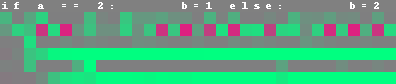

In [46]:
def visualize_neurons(neurons, code, act, cell_size=12):
    img = np.full((len(neurons) + 1, len(code), 3), 128)
    scores = (act[:, neurons].T + 1) / 2
    img[1:, :, 0] = 255 * (1 - scores)
    img[1:, :, 1] = 255 * scores

    f = BytesIO()
    img = scipy.misc.imresize(img, float(cell_size), interp='nearest')
    pil_img = PIL.Image.fromarray(img)
    draw = ImageDraw.Draw(pil_img)
    for idx, ch in enumerate(code):
        draw.text((idx * cell_size + 2, 0), ch)
    pil_img.save(f, 'png')
    return Image(data=f.getvalue())

img = visualize_neurons(neurons, example_code, act)
display(img)

/home/lq/anaconda2/envs/cookbook/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


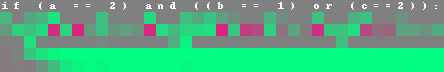

In [47]:
def image_for_code(code):
    act = activations(flat_model, code)
    neurons = interesting_neurons(act)
    return visualize_neurons(neurons, code, act)

display(image_for_code('if (a == 2) and ((b == 1) or (c==2)):'))

In [48]:
code = 'if (a == 2) and ((b == 1) or (c==2)):'
mask = '   ________     ____________________ '
act = activations(flat_model, code)
positive = [idx for idx, ch in enumerate(mask) if ch == '_']
negative = [idx for idx, ch in enumerate(mask) if ch != '_']

neurons = np.argsort(act[positive].sum(axis=0) - act[negative].sum(axis=0))[-5:]

/home/lq/anaconda2/envs/cookbook/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


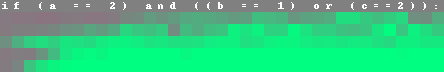

In [49]:
img = visualize_neurons(neurons, code, act)
display(img)

# 问答

In [50]:
import re
import os
import keras.backend as K
import numpy as np
import pandas as pd
from keras import layers, models, utils
import json

In [51]:
def reset_everything():
    import tensorflow as tf
    %reset -f in out dhist
    tf.reset_default_graph()
    K.set_session(tf.InteractiveSession())
    
# Constants for our networks.  We keep these deliberately small to reduce training time.
VOCAB_SIZE = 250000
EMBEDDING_SIZE = 100
MAX_DOC_LEN = 128
MIN_DOC_LEN = 12

In [58]:
def extract_stackexchange(filename, limit=1000000):
    json_file = filename + 'limit=%s.json' % limit

    rows = []
    for i, line in enumerate(os.popen('7z x -so "%s" Posts.xml' % filename)):
        line = str(line)
        if not line.startswith('  <row'):
            continue
            
        if i % 1000 == 0:
            print('\r%05d/%05d' % (i, limit), end='', flush=True)

        parts = line[6:-5].split('"')
        record = {}
        for i in range(0, len(parts), 2):
            k = parts[i].replace('=', '').strip()
            v = parts[i+1].strip()
            record[k] = v
        rows.append(record)
        
        if len(rows) > limit:
            break
    
    with open(json_file, 'w') as fout:
        json.dump(rows, fout)
    
    return rows


xml_7z = utils.get_file(
    fname='travel.stackexchange.com.7z',
    origin='https://ia800107.us.archive.org/27/items/stackexchange/travel.stackexchange.com.7z',
)
print(xml_7z)

rows = extract_stackexchange(xml_7z)
print(rows)

/home/lq/.keras/datasets/travel.stackexchange.com.7z
91000/1000000

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## 数据探索

In [59]:
df = pd.DataFrame.from_records(rows)    
df = df.set_index('Id', drop=False)
df['Title'] = df['Title'].fillna('').astype('str')
df['Tags'] = df['Tags'].fillna('').astype('str')
df['Body'] = df['Body'].fillna('').astype('str')
df['Id'] = df['Id'].astype('int')
df['PostTypeId'] = df['PostTypeId'].astype('int')
df['ViewCount'] = df['ViewCount'].astype('float')

df.head()

,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,Id,LastActivityDate,...,LastEditorDisplayName,LastEditorUserId,OwnerDisplayName,OwnerUserId,ParentId,PostTypeId,Score,Tags,Title,ViewCount
Id,,,,,,,,,,,,,,,,,,,,,
1,393,4,&lt;p&gt;My fiancée and I are looking for a go...,2013-02-25T23:52:47.953,4,NaN,2011-06-21T20:19:34.730,NaN,1,2012-05-24T14:52:14.760,...,NaN,101,NaN,9,NaN,1,8,&lt;caribbean&gt;&lt;cruising&gt;&lt;vacations...,What are some Caribbean cruises for October?,444.0
2,NaN,8,&lt;p&gt;This was one of our definition questi...,NaN,4,NaN,2011-06-21T20:22:33.760,5,2,2018-08-26T00:04:13.520,...,NaN,51577,NaN,13,NaN,1,36,&lt;guides&gt;&lt;extreme-tourism&gt;&lt;amazo...,How can I find a guide that will take me safel...,1997.0
3,NaN,NaN,&lt;p&gt;One way would be to go through an Adv...,NaN,2,NaN,2011-06-21T20:24:28.080,NaN,3,2011-06-21T20:24:28.080,...,NaN,NaN,NaN,9,2,2,14,,,NaN
4,NaN,1,&lt;p&gt;Singapore Airlines has an all-busines...,NaN,1,NaN,2011-06-21T20:24:57.160,NaN,4,2013-01-09T09:55:22.743,...,NaN,693,NaN,24,NaN,1,8,&lt;loyalty-programs&gt;&lt;routes&gt;&lt;ewr&...,Does Singapore Airlines offer any reward seats...,253.0
5,770,5,&lt;p&gt;Another definition question that inte...,NaN,0,NaN,2011-06-21T20:25:56.787,2,5,2012-10-12T20:49:08.110,...,NaN,101,NaN,13,NaN,1,13,&lt;romania&gt;&lt;transportation&gt;,What is the easiest transportation to use thro...,421.0


In [60]:
list(df[df['ViewCount'] > 250000]['Title'])

['Do I need a US visa to transit (or layover) through an American airport?',
 'How to get from Nice to Monaco by public transport?',
 'Should my first trip be to the country which issued my Schengen Visa?',
 'Can I use Google Maps traffic information to estimate driving time for a specific date/time?',
 'Are aerosol cans allowed and safe, in checked luggage?',
 'How to track my UK Visa Application Status?',
 "When applying for an Indian Passport, how do I know if I'm in the ECR or non-ECR category?",
 'Are battery packs allowed in hand luggage?']

In [61]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(df['Body'] + df['Title'])

# Compute TF/IDF Values
total_count = sum(tokenizer.word_counts.values())
idf = { k: np.log(total_count/v) for (k,v) in tokenizer.word_counts.items() }

In [63]:
# Download pre-trained word2vec embeddings

import gensim

glove_100d = utils.get_file(
    fname='glove.6B.100d.txt',
    origin='https://storage.googleapis.com/deep-learning-cookbook/glove.6B.100d.txt',
)

w2v_100d = glove_100d + '.w2v'
from gensim.scripts.glove2word2vec import glove2word2vec
glove2word2vec(glove_100d, w2v_100d)
w2v_model = gensim.models.KeyedVectors.load_word2vec_format(w2v_100d)

w2v_weights = np.zeros((VOCAB_SIZE, w2v_model.syn0.shape[1]))
idf_weights = np.zeros((VOCAB_SIZE, 1))

for k, v in tokenizer.word_index.items():
    if v >= VOCAB_SIZE:
        continue
    
    if k in w2v_model:
        w2v_weights[v] = w2v_model[k]
    
    idf_weights[v] = idf[k]
    
del w2v_model

In [64]:
df['title_tokens'] = tokenizer.texts_to_sequences(df['Title'])
df['body_tokens'] = tokenizer.texts_to_sequences(df['Body'])

In [65]:
import random

# We can create a data generator that will randomly title and body tokens for questions.  
# We'll use random text from other questions as a negative example when necessary.
def data_generator(batch_size, negative_samples=1):
    questions = df[df['PostTypeId'] == 1]
    all_q_ids = list(questions.index)
        
    batch_x_a = []
    batch_x_b = []
    batch_y = []
    
    def _add(x_a, x_b, y):
        batch_x_a.append(x_a[:MAX_DOC_LEN])
        batch_x_b.append(x_b[:MAX_DOC_LEN])
        batch_y.append(y)
    
    while True:
        questions = questions.sample(frac=1.0)
        
        for i, q in questions.iterrows():
            _add(q['title_tokens'], q['body_tokens'], 1)
            
            negative_q = random.sample(all_q_ids, negative_samples)
            for nq_id in negative_q:
                _add(q['title_tokens'], df.at[nq_id, 'body_tokens'], 0)            
            
            if len(batch_y) >= batch_size:
                yield ({
                    'title': pad_sequences(batch_x_a, maxlen=None),
                    'body': pad_sequences(batch_x_b, maxlen=None),
                }, np.asarray(batch_y))
                
                batch_x_a = []
                batch_x_b = []
                batch_y = []

# dg = data_generator(1, 2)
# next(dg)
# next(dg)

## 嵌入查询

In [66]:
questions = df[df['PostTypeId'] == 1]['Title'].reset_index(drop=True)
question_tokens = pad_sequences(tokenizer.texts_to_sequences(questions))

class EmbeddingWrapper(object):
    def __init__(self, model):
        self._r = questions
        self._i = {i:s for (i, s) in enumerate(questions)}
        self._w = model.predict({'title': question_tokens}, verbose=1, batch_size=1024)
        self._model = model
        self._norm = np.sqrt(np.sum(self._w * self._w + 1e-5, axis=1))

    def nearest(self, sentence, n=10):
        x = tokenizer.texts_to_sequences([sentence])
        if len(x[0]) < MIN_DOC_LEN:
            x[0] += [0] * (MIN_DOC_LEN - len(x))
        e = self._model.predict(np.asarray(x))[0]
        norm_e = np.sqrt(np.dot(e, e))
        dist = np.dot(self._w, e) / (norm_e * self._norm)

        top_idx = np.argsort(dist)[-n:]
        return pd.DataFrame.from_records([
            {'question': self._r[i], 'dist': float(dist[i])}
            for i in top_idx
        ])

In [67]:
# Our first model will just sum up the embeddings of each token.
# The similarity between documents will be the dot product of the final embedding.

import tensorflow as tf

def sum_model(embedding_size, vocab_size, embedding_weights=None, idf_weights=None):
    title = layers.Input(shape=(None,), dtype='int32', name='title')
    body = layers.Input(shape=(None,), dtype='int32', name='body')

    def make_embedding(name):
        if embedding_weights is not None:
            embedding = layers.Embedding(mask_zero=True, input_dim=vocab_size, output_dim=w2v_weights.shape[1], 
                                         weights=[w2v_weights], trainable=False, 
                                         name='%s/embedding' % name)
        else:
            embedding = layers.Embedding(mask_zero=True, input_dim=vocab_size, output_dim=embedding_size,
                                        name='%s/embedding' % name)

        if idf_weights is not None:
            idf = layers.Embedding(mask_zero=True, input_dim=vocab_size, output_dim=1, 
                                   weights=[idf_weights], trainable=False,
                                   name='%s/idf' % name)
        else:
            idf = layers.Embedding(mask_zero=True, input_dim=vocab_size, output_dim=1,
                                   name='%s/idf' % name)
            
        return embedding, idf
    
    embedding_a, idf_a = make_embedding('a')
    embedding_b, idf_b = embedding_a, idf_a
#     embedding_b, idf_b = make_embedding('b')

    mask = layers.Masking(mask_value=0)
    def _combine_and_sum(args):
        [embedding, idf] = args
        return K.sum(embedding * K.abs(idf), axis=1)

    sum_layer = layers.Lambda(_combine_and_sum, name='combine_and_sum')

    sum_a = sum_layer([mask(embedding_a(title)), idf_a(title)])
    sum_b = sum_layer([mask(embedding_b(body)), idf_b(body)])

    sim = layers.dot([sum_a, sum_b], axes=1, normalize=True)
    sim_model = models.Model(
        inputs=[title, body],
        outputs=[sim],
    )
    sim_model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])
    sim_model.summary()

    embedding_model = models.Model(
        inputs=[title],
        outputs=[sum_a]
    )
    return sim_model, embedding_model

In [68]:
# Try using our model with pretrained weights from word2vec

sum_model_precomputed, sum_embedding_precomputed = sum_model(
    embedding_size=EMBEDDING_SIZE, vocab_size=VOCAB_SIZE,
    embedding_weights=w2v_weights, idf_weights=idf_weights
)

x, y = next(data_generator(batch_size=4096))
sum_model_precomputed.evaluate(x, y)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title (InputLayer)              (None, None)         0                                            
__________________________________________________________________________________________________
body (InputLayer)               (None, None)         0                                            
__________________________________________________________________________________________________
a/embedding (Embedding)         (None, None, 100)    25000000    title[0][0]                      
                                                                 body[0][0]                       
__________________________________________________________________________________________________
masking_1 (Masking)             (None, None, 100)    0           a/embedding[0][0]                
          

[0.96687109768390656, 0.510498046875]

In [69]:
SAMPLE_QUESTIONS = [
    'Roundtrip ticket versus one way',
    'Shinkansen from Kyoto to Hiroshima',
    'Bus tour of Germany',
]

def evaluate_sample(lookup):
    pd.set_option('display.max_colwidth', 100)
    results = []
    for q in SAMPLE_QUESTIONS:
        print(q)
        q_res = lookup.nearest(q, n=4)
        q_res['result'] = q_res['question']
        q_res['question'] = q
        results.append(q_res)

    return pd.concat(results)

lookup = EmbeddingWrapper(model=sum_embedding_precomputed)
evaluate_sample(lookup)

33413/33413 [==============================] - 0s 6us/step
Roundtrip ticket versus one way
Shinkansen from Kyoto to Hiroshima
Bus tour of Germany


,dist,question,result
0,0.811748,Roundtrip ticket versus one way,"Buy a roundtrip ticket for two people, but second person only travels on return - is that possible"
1,0.813634,Roundtrip ticket versus one way,How to pick the (phony) return destination for a roundtrip ticket intended as a one-way?
2,0.815370,Roundtrip ticket versus one way,What is cheapest way to fly around SE Asia in a circuit - hub with roundtrip tickets or sequence...
3,0.826476,Roundtrip ticket versus one way,The penalty for changing an airline ticket is per leg or per ticket?
0,0.753331,Shinkansen from Kyoto to Hiroshima,Culture Day in Osaka/Kyoto
1,0.756834,Shinkansen from Kyoto to Hiroshima,Where does the Tokaido Shinkansen stop in Tokyo?
2,0.775567,Shinkansen from Kyoto to Hiroshima,Best connection Tokyo - Kyoto
3,0.812919,Shinkansen from Kyoto to Hiroshima,Travel from Tokyo to Sendai with Shinkansen
0,0.891266,Bus tour of Germany,Trip in the south of Germany
1,0.895140,Bus tour of Germany,Travelling outside of Germany on a German Working Holiday visa (Australian)


## 训练自己的模型

In [70]:
sum_model_trained, sum_embedding_trained = sum_model(
    embedding_size=EMBEDDING_SIZE, vocab_size=VOCAB_SIZE, 
    embedding_weights=None,
    idf_weights=None
)
sum_model_trained.fit_generator(
    data_generator(batch_size=128),
    epochs=10,
    steps_per_epoch=1000
)
lookup = EmbeddingWrapper(model=sum_embedding_trained)
evaluate_sample(lookup)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title (InputLayer)              (None, None)         0                                            
__________________________________________________________________________________________________
body (InputLayer)               (None, None)         0                                            
__________________________________________________________________________________________________
a/embedding (Embedding)         (None, None, 100)    25000000    title[0][0]                      
                                                                 body[0][0]                       
__________________________________________________________________________________________________
masking_2 (Masking)             (None, None, 100)    0           a/embedding[0][0]                
          

,dist,question,result
0,0.764541,Roundtrip ticket versus one way,book return ticket with additional traveller on return ticket
1,0.776821,Roundtrip ticket versus one way,Why are one-way plane tickets more expensive than return tickets?
2,0.780254,Roundtrip ticket versus one way,How to get return prices for a one way ticket?
3,0.862359,Roundtrip ticket versus one way,"Buy a roundtrip ticket for two people, but second person only travels on return - is that possible"
0,0.959117,Shinkansen from Kyoto to Hiroshima,Hokkaido night trains after Shinkansen introduction
1,0.962810,Shinkansen from Kyoto to Hiroshima,Can I buy Shinkansen tickets that allow onward travel on JR regional trains?
2,0.967823,Shinkansen from Kyoto to Hiroshima,Can I converse with Japanese travellers on the Shinkansen or is it rude?
3,0.969272,Shinkansen from Kyoto to Hiroshima,What are my options for reserving JR Shinkansen tickets in advance over the new year period?
0,0.682981,Bus tour of Germany,Website showing cheap flight offers for Germany
1,0.684278,Bus tour of Germany,Trip in the south of Germany


### CNN

In [71]:
def cnn_model(embedding_size, vocab_size):
    title = layers.Input(shape=(None,), dtype='int32', name='title')
    body = layers.Input(shape=(None,), dtype='int32', name='body')

    embedding = layers.Embedding(
        mask_zero=False,
        input_dim=vocab_size,
        output_dim=embedding_size,
    )


    def _combine_sum(v):
        return K.sum(v, axis=1)

    cnn_1 = layers.Convolution1D(256, 3)
    cnn_2 = layers.Convolution1D(256, 3)
    cnn_3 = layers.Convolution1D(256, 3)
    
    global_pool = layers.GlobalMaxPooling1D()
    local_pool = layers.MaxPooling1D(strides=2, pool_size=3)

    def forward(input):
        embed = embedding(input)
        return global_pool(
            cnn_2(local_pool(cnn_1(embed))))

    sum_a = forward(title)
    sum_b = forward(body)

    sim = layers.dot([sum_a, sum_b], axes=1, normalize=False)
    sim_model = models.Model(
        inputs=[title, body],
        outputs=[sim],
    )
    sim_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

    embedding_model = models.Model(
        inputs=[title],
        outputs=[sum_a]
    )
    return sim_model, embedding_model

In [72]:
cnn, cnn_embedding = cnn_model(embedding_size=25, vocab_size=VOCAB_SIZE)
cnn.summary()
cnn.fit_generator(
    data_generator(batch_size=128),
    epochs=10,
    steps_per_epoch=1000,
)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title (InputLayer)              (None, None)         0                                            
__________________________________________________________________________________________________
body (InputLayer)               (None, None)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 25)     6250000     title[0][0]                      
                                                                 body[0][0]                       
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, None, 256)    19456       embedding_1[0][0]                
          

In [73]:
lookup = EmbeddingWrapper(model=cnn_embedding)
evaluate_sample(lookup)

33413/33413 [==============================] - 1s 16us/step
Roundtrip ticket versus one way
Shinkansen from Kyoto to Hiroshima
Bus tour of Germany


,dist,question,result
0,0.987472,Roundtrip ticket versus one way,Unmatching Barcode
1,0.987487,Roundtrip ticket versus one way,Warrants and travel
2,0.987875,Roundtrip ticket versus one way,Mugging 'Etiquette'?
3,0.991276,Roundtrip ticket versus one way,Tegelbergbahn Tickets
0,0.994949,Shinkansen from Kyoto to Hiroshima,Unmatching Barcode
1,0.995584,Shinkansen from Kyoto to Hiroshima,Marseille to Bologna
2,0.995852,Shinkansen from Kyoto to Hiroshima,Mugging 'Etiquette'?
3,0.998736,Shinkansen from Kyoto to Hiroshima,Tegelbergbahn Tickets
0,0.979173,Bus tour of Germany,Unmatching Barcode
1,0.980173,Bus tour of Germany,Mugging 'Etiquette'?


### LSTM

In [74]:
def lstm_model(embedding_size, vocab_size):
    title = layers.Input(shape=(None,), dtype='int32', name='title')
    body = layers.Input(shape=(None,), dtype='int32', name='body')

    embedding = layers.Embedding(
        mask_zero=True,
        input_dim=vocab_size,
        output_dim=embedding_size,
#         weights=[w2v_weights],
#         trainable=False
    )

    lstm_1 = layers.LSTM(units=512, return_sequences=True)
    lstm_2 = layers.LSTM(units=512, return_sequences=False)
    
    sum_a = lstm_2(lstm_1(embedding(title)))
    sum_b = lstm_2(lstm_1(embedding(body)))

    sim = layers.dot([sum_a, sum_b], axes=1, normalize=True)
#     sim = layers.Activation(activation='sigmoid')(sim)
    sim_model = models.Model(
        inputs=[title, body],
        outputs=[sim],
    )
    sim_model.compile(loss='binary_crossentropy', optimizer='rmsprop')

    embedding_model = models.Model(
        inputs=[title],
        outputs=[sum_a]
    )
    return sim_model, embedding_model

In [77]:
lstm, lstm_embedding = lstm_model(embedding_size=EMBEDDING_SIZE, vocab_size=VOCAB_SIZE)
lstm.summary()
lstm.fit_generator(
    data_generator(batch_size=128),
    epochs=10,
    steps_per_epoch=100,
)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title (InputLayer)              (None, None)         0                                            
__________________________________________________________________________________________________
body (InputLayer)               (None, None)         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 100)    25000000    title[0][0]                      
                                                                 body[0][0]                       
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, None, 512)    1255424     embedding_2[0][0]                
          

In [78]:
lookup = EmbeddingWrapper(model=lstm_embedding)
evaluate_sample(lookup)

33413/33413 [==============================] - 23s 693us/step
Roundtrip ticket versus one way
Shinkansen from Kyoto to Hiroshima
Bus tour of Germany


,dist,question,result
0,0.999889,Roundtrip ticket versus one way,Wheeled backpack with waist strap?
1,0.999891,Roundtrip ticket versus one way,Nigeria to India via Istanbul
2,0.999891,Roundtrip ticket versus one way,Identify this waterfall in Myanmar
3,0.999908,Roundtrip ticket versus one way,Physical (demanding) activities in Berlin
0,0.999920,Shinkansen from Kyoto to Hiroshima,Two long layovers in Tokyo
1,0.999926,Shinkansen from Kyoto to Hiroshima,Keflavik International Airport to Selfoss
2,0.999927,Shinkansen from Kyoto to Hiroshima,DS160 online form - Arrival flight
3,0.999932,Shinkansen from Kyoto to Hiroshima,Canada TRV application form relation
0,0.999756,Bus tour of Germany,Matsushiro Underground Imperial Headquarters
1,0.999757,Bus tour of Germany,Air travel while pregnant
